<a href="https://colab.research.google.com/github/eckoecho/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





#**Prediction of Product Sales**
**Author:**Echo Diaz

**Last Updated:** May 2023


## **Project Overview**


## **Load and Inspect Data**

In [38]:
#Importing the necessary libraries
import pandas as pd
import missingno as msno
import seaborn as sns

In [39]:
#Setting the path to pull our data
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [40]:
#Converting our CSV into a dataframe
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
#Checking for various aspects: column & row count, data types, and any nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Clean Data**

### Overview of Our Data

In [42]:
#Looking at the numbr of rows and columns
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 8523 rows and 12 columns.


In [43]:
#Data Types for Each Feature
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [44]:
#Checking for duplicates within all rows
duplicated_rows = df.duplicated()
duplicated_rows.sum()
#No duplicates to drop

0

In [45]:
#Looking throughout the rows for nulls
null_sums = df.isna().sum()
null_sums
#The results show 2 columns with missing data: Item_Weight, Outlet_Size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [46]:
#This allows me to see if i should drop any columns with a lot of missing data
null_percentage = null_sums/len(df) * 100
null_percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<Axes: >

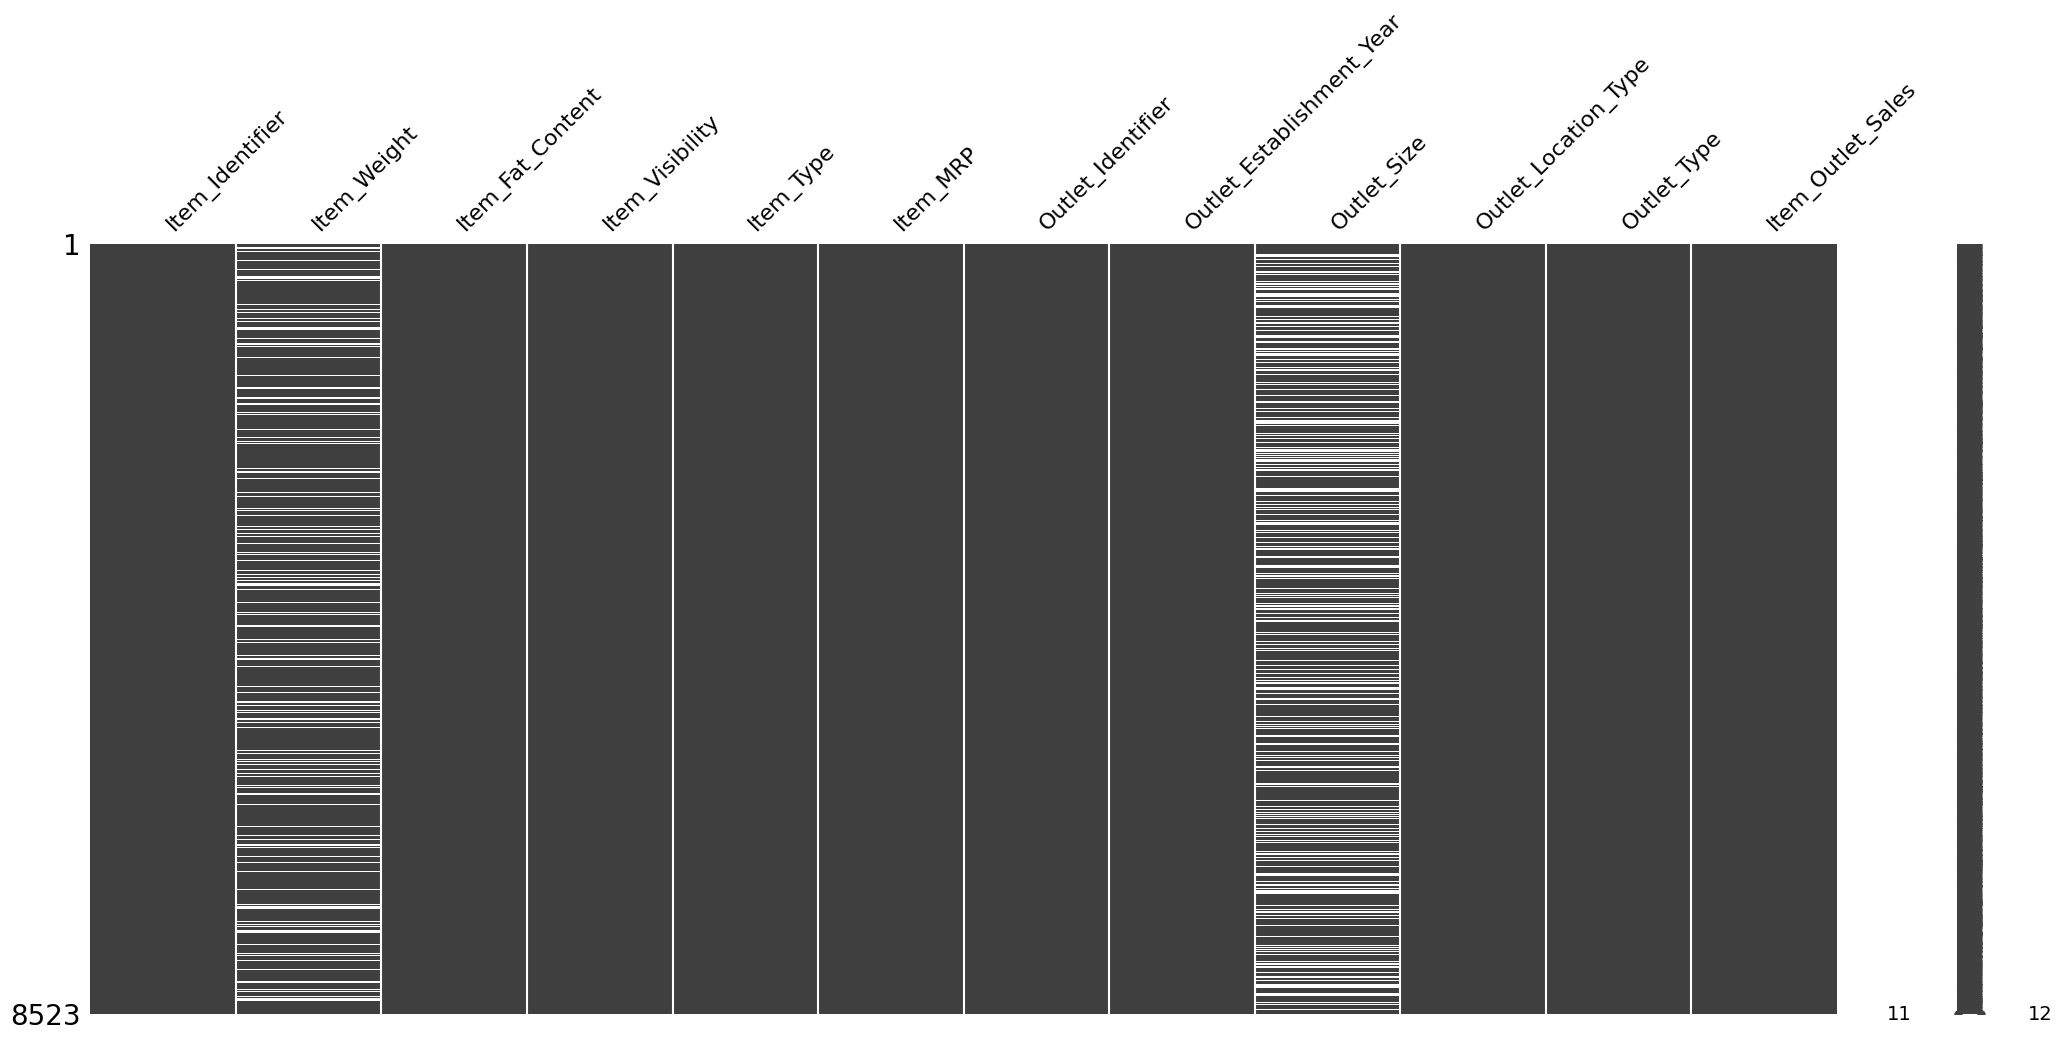

In [47]:
#A quick visualization of where the nulls equal white spaces
#This corresponds with out perecntages above
msno.matrix(df)

### `Item_Weight` Cleaning

In [48]:
#Viewing the value count for the majority of the rows in the Item Weight column
#Majority fall under 12.150
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [49]:
#Finding out the most common value of Item Weight to fill in nulls
item_weight_median = df["Item_Weight"].median()
item_weight_median


12.6

In [50]:
#Filling missing values in most common Item Weight
df["Item_Weight"] = df['Item_Weight'].fillna(item_weight_median)
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [51]:
#Now checking to ensure nulls dont exist anymore
df['Item_Weight'].isna().sum()
#Zero means we successfully cleaned up with feature

0

### `Outlet_Size` Cleaning

In [52]:
#Viewing the value count for the majority of the rows in the Outlet_Size column to see if there any value outlier
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [53]:
#Medium is the most common value so i will be replacing the null values with Medium
df["Outlet_Size"] = df["Outlet_Size"].fillna("Unknown")
df["Outlet_Size"].isna().sum()
#We can now see that our Outlet_Size feature has no missing values

0

In [54]:
#Now our dataset has values for each feature
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### String Columns Cleaning

In [55]:
#Fixing string inconsistencies
#First, obtaining all features with string values
str_cols = df.select_dtypes(include="object").columns
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [56]:
#Looping thru each column and getting value_counts to see out of place values in each feature
for col in str_cols:
    print(f"Value counts for {col}: ")
    print(df[col].value_counts())  
    #Increase readibility with new lines between results
    print("\n")


Value counts for Item_Identifier: 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Fat_Content: 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type: 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier: 
OUT027    935
OUT013    932
OUT049    930
OUT046

In [57]:
rename_dict = {"low fat": "Low Fat",
               "LF": "Low Fat",
               "reg": "Regular"}

In [58]:
#Item_Fat_Content values are inconsistent, going to standardize with .str.replace
#Convert using .str.replace("old","new")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(rename_dict, regex=True)
df['Item_Fat_Content'].value_counts()
#We now have standardized our Item_Fat_Content feature

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Numerical Stats After Cleaning

In [59]:
#For any numerical columns, we obtain the summary statistics of each (min, max, mean).
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## **Exploratory Data Analysis**

## Histograms for Categorical Columns



The number of items these stores sold by category.

<ipython-input-64-b0b060651d27>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


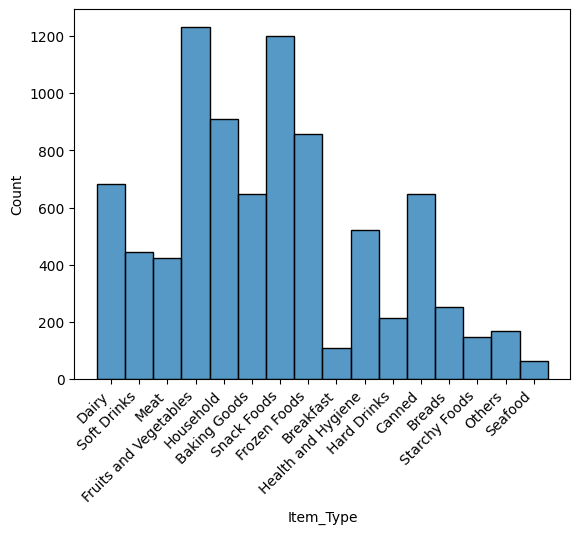

In [64]:
# Putting Item Type in a Histograph
ax = sns.histplot(df, x="Item_Type")
#Rotating and setting horizontal alignment for x category labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

We are looking at the difference between the number of regular fat content items vs. low fat content items.


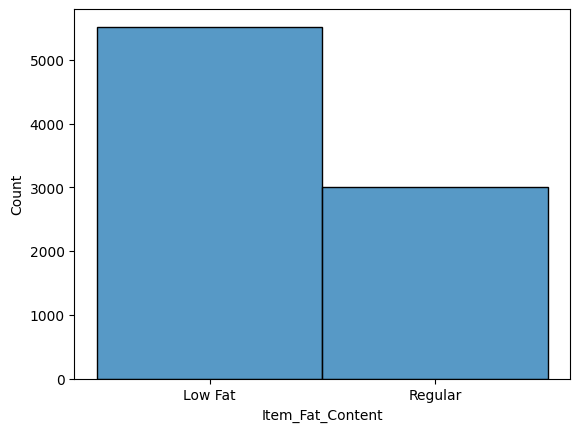

In [68]:
#Search for Item_Fat_Content
ax = sns.histplot(df, x="Item_Fat_Content")

The number of Outlet_Location_Types categorized by Tier 1, 2, and 3.

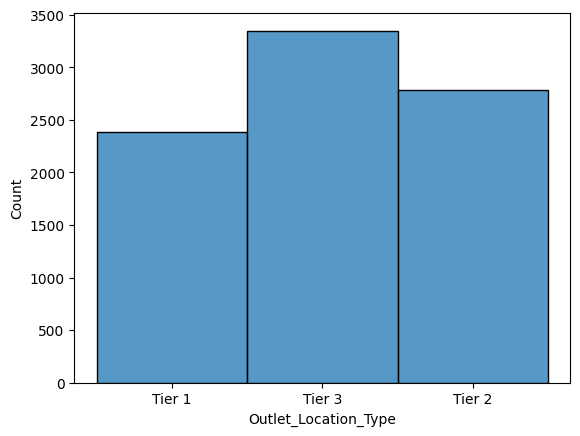

In [69]:
#Categorize and counting the Outlet Location Type
ax = sns.histplot(df, x="Outlet_Location_Type")

The number of outlets that fit into a categorical size: Small, Medium, High, and Unknown

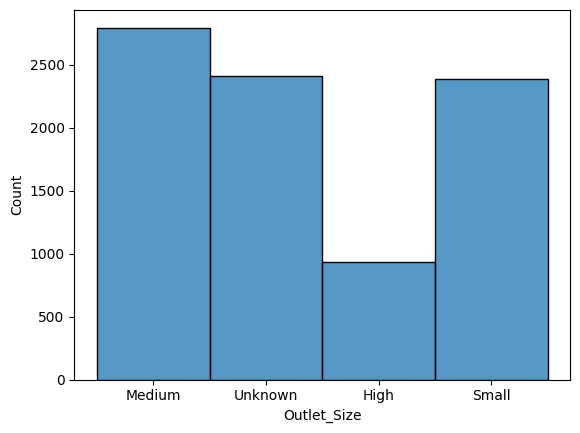

In [70]:
#Categorize and counting the Outlet Size
ax = sns.histplot(df, x="Outlet_Size")

Outlet_Type

<ipython-input-74-8c5ce7e21b58>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


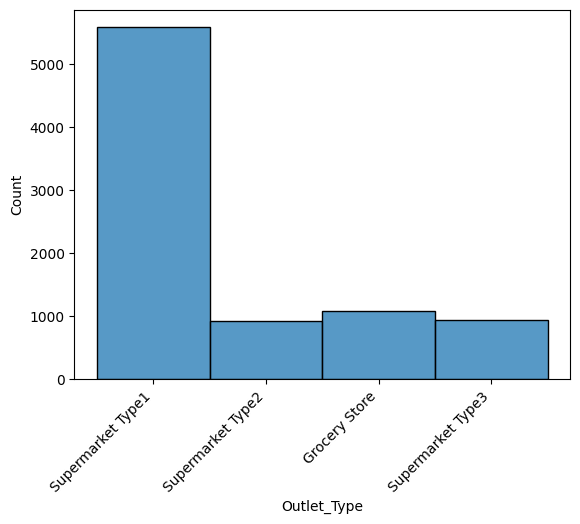

In [74]:
#Categorize and counting the Outlet Location Type
ax = sns.histplot(df, x="Outlet_Type")
#Rotating and horiztonal alignment for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

## Boxplots for Numericals Columns

Showing numerical distribution of Item_Sales (median, interquartile,min, max)

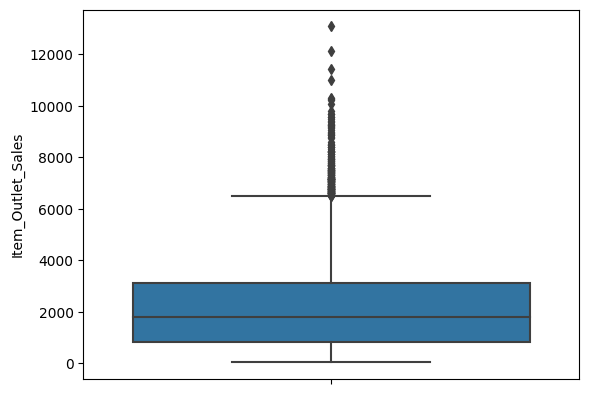

In [77]:
#Displaying Outlet sales as boxplot
ax = sns.boxplot(df, y="Item_Outlet_Sales")

Comparing the median number of sales based on established outlet year.

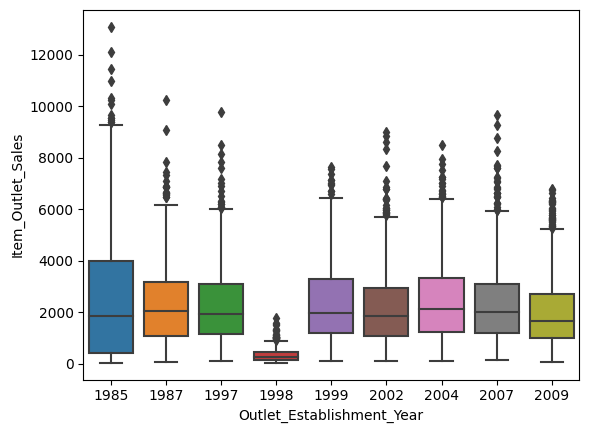

In [81]:
#Item Outlet sales vs. Outlet using boxplot
ax = sns.boxplot(df,y="Item_Outlet_Sales", x="Outlet_Establishment_Year")

## Heatmap

In [86]:
#Finding correlation between our numeric data
corr = df.corr(numeric_only = True)
#Rounding off for visibility
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


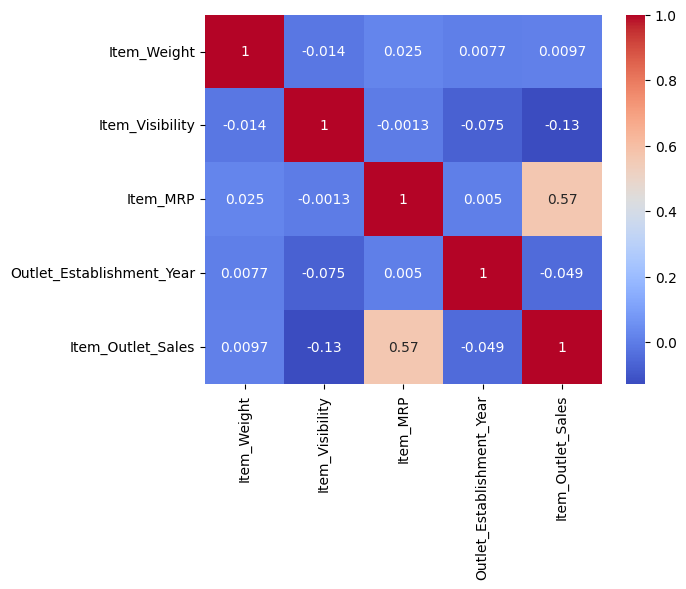

In [90]:
#Creating a heatmap to easily show correlations in our numeric data
sns.heatmap(corr, cmap="coolwarm", annot=True);

## **Explanatory Data Analysis**